# Parcial 4 David Henao Molina 


## punto 4 
Definir la frecuencia de muestreo para la siguiente señal y obtener las muestras de 10
segundos de la señal usando Colab

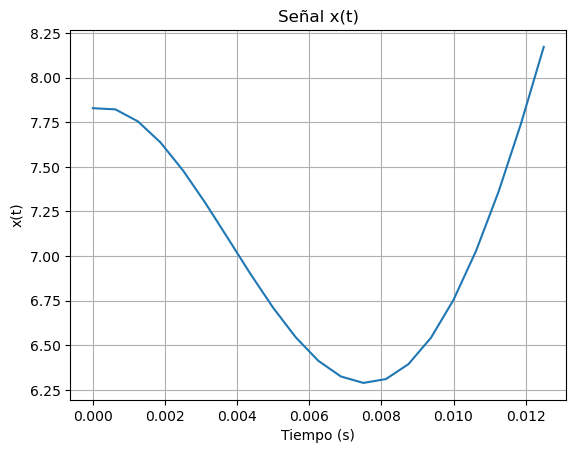

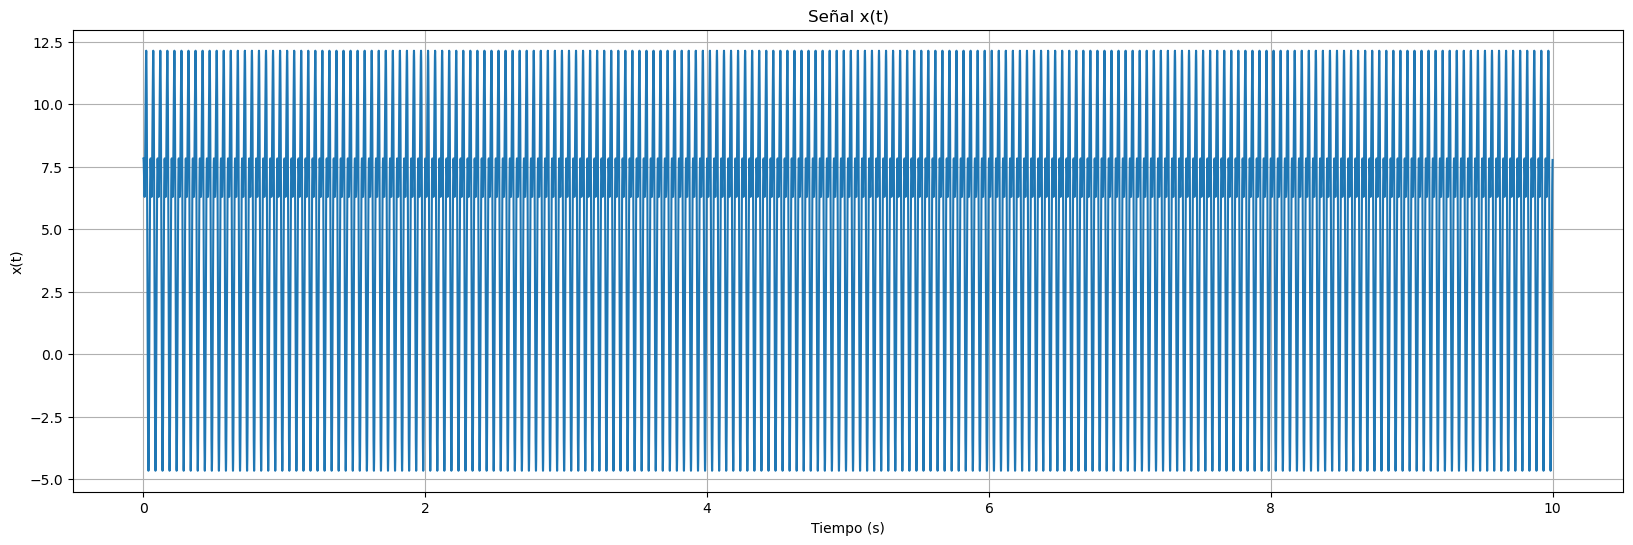

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Según el teorema de nyquist la frecuencia de muestreo debe ser el doble de la drecuencia max
fo = 80 # 80 es la frecuencia máxima
fs = 160*10
k = 2*(2+1)

# Se graficó la primera vez y tenia muy mala resolucion, asi que multipliqué por 10
# Vector de tiempo para un periodo
t= np.arange(0,1/fo + 1/fs,1/fs)
x = 4 * np.cos(80*np.pi*t + (np.pi/4)) + k*np.sin(40*np.pi*t) + 5
plt.plot(t, x)
plt.title('Señal x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('x(t)')
plt.grid()
plt.show()

# ahora graficamos los 10 segundos

t10 = np.arange(0,10,1/fs)
x10 = 4 * np.cos(80*np.pi*t10 + (np.pi/4)) + k*np.sin(40*np.pi*t10) + 5
plt.figure(figsize=(20, 6))
plt.plot(t10, x10)
plt.title('Señal x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('x(t)')
plt.grid()
plt.show()

# Punto 5

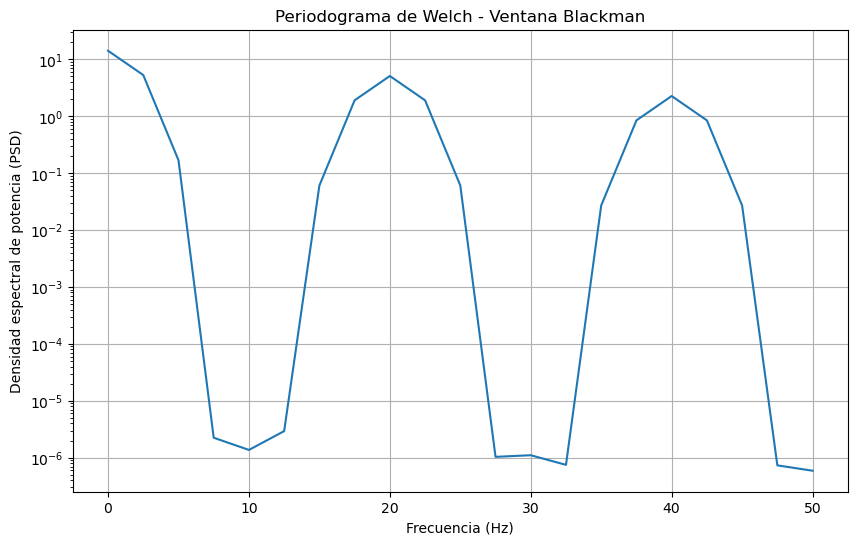

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def periodograma_welch(x, fs, M, S, window_type):
    # Número total de segmentos
    step = M - S  # Desplazamiento entre segmentos
    num_segments = (len(x) - S) // step
    # Crear la ventana
    if window_type.lower() == 'blackman':
        window = np.blackman(M)
    else:
        raise ValueError("Tipo de ventana no soportada.")
    # Normalización de la ventana
    window_energy = np.sum(window ** 2)
    Pxx_avg = np.zeros(M // 2 + 1)
    
    # Iterar sobre los segmentos
    for i in range(num_segments):
        start = i * step
        segment = x[start:start + M]
        
        # Asegurarse de que el segmento sea del tamaño correcto
        if len(segment) < M:
            break
        
        # Aplicar ventana
        segment_windowed = segment * window
        
        # Transformada de Fourier del segmento
        fft_segment = np.fft.rfft(segment_windowed, n=M)
        periodogram = (np.abs(fft_segment) ** 2) / (M * window_energy)
        
        # Acumular el periodograma
        Pxx_avg += periodogram
    
    # Promediar los periodogramas
    Pxx_avg /= num_segments
    
    # Frecuencias asociadas
    f = np.fft.rfftfreq(M, d=1/fs)
    
    return f, Pxx_avg

# Parámetros
fs = 100  # Frecuencia de muestreo
M = 40    # Muestras por segmento
S = 15    # Solapamiento
t = np.linspace(0, 10, fs * 10, endpoint=False)  # 10 segundos de señal
a = 2  # Último número de la cédula (modificar según el caso)
k = 2 * (2+ 1)

# Señal del punto 4 (grupo de John): x(t) = 4*cos(80πt + π/4) + k*sin(40πt) + 5
x = 4 * np.cos(80 * np.pi * t + np.pi / 4) + k * np.sin(40 * np.pi * t) + 5

# Calcular periodograma de Welch
f, Pxx = periodograma_welch(x, fs, M, S, window_type='blackman')

# Graficar la densidad espectral de potencia
plt.figure(figsize=(10, 6))
plt.semilogy(f, Pxx)
plt.title("Periodograma de Welch - Ventana Blackman")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia (PSD)")
plt.grid()
plt.show()


# Punto 7


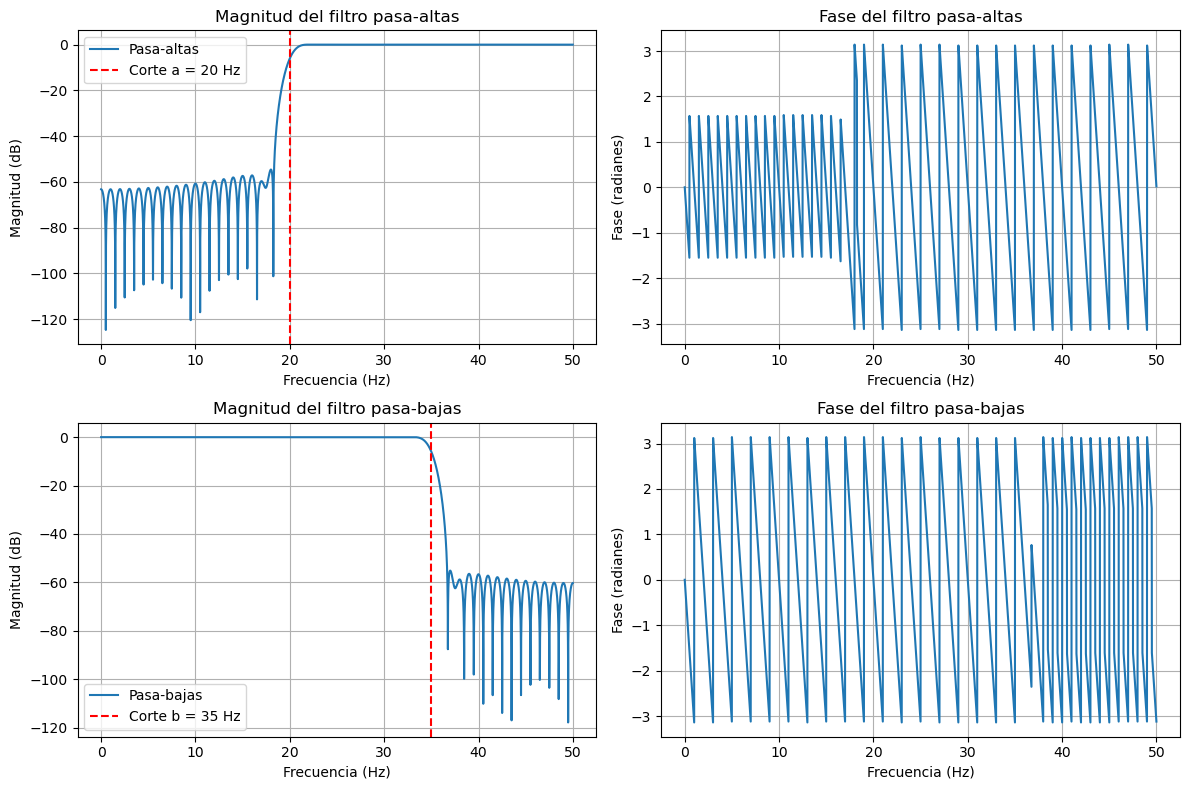

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Datos del problema
fs = 100  
a = 20    
b = 35   

# Diseño del filtro pasa-altas
numtaps_high = 101  # Número de coeficientes del filtro (orden + 1)
cutoff_high = a / (fs / 2)  # Frecuencia de corte normalizada (Nyquist = fs/2)
filter_high = firwin(numtaps_high, cutoff=cutoff_high, pass_zero=False)

# Diseño del filtro pasa-bajas
numtaps_low = 101  # Número de coeficientes del filtro (orden + 1)
cutoff_low = b / (fs / 2)  # Frecuencia de corte normalizada (Nyquist = fs/2)
filter_low = firwin(numtaps_low, cutoff=cutoff_low, pass_zero=True)

# Respuesta en frecuencia para el filtro pasa-altas
w_high, h_high = freqz(filter_high, worN=8000, fs=fs)
# Respuesta en frecuencia para el filtro pasa-bajas
w_low, h_low = freqz(filter_low, worN=8000, fs=fs)

# Graficar resultados
plt.figure(figsize=(12, 8))

# Magnitud del filtro pasa-altas
plt.subplot(2, 2, 1)
plt.plot(w_high, 20 * np.log10(abs(h_high)), label="Pasa-altas")
plt.title("Magnitud del filtro pasa-altas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.grid()
plt.axvline(a, color='r', linestyle='--', label=f'Corte a = {a} Hz')
plt.legend()

# Fase del filtro pasa-altas
plt.subplot(2, 2, 2)
plt.plot(w_high, np.angle(h_high))
plt.title("Fase del filtro pasa-altas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.grid()

# Magnitud del filtro pasa-bajas
plt.subplot(2, 2, 3)
plt.plot(w_low, 20 * np.log10(abs(h_low)), label="Pasa-bajas")
plt.title("Magnitud del filtro pasa-bajas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.grid()
plt.axvline(b, color='r', linestyle='--', label=f'Corte b = {b} Hz')
plt.legend()

# Fase del filtro pasa-bajas
plt.subplot(2, 2, 4)
plt.plot(w_low, np.angle(h_low))
plt.title("Fase del filtro pasa-bajas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.grid()

plt.tight_layout()
plt.show()
